# COGS 108 - Final Project 

# Overview

# Names

- EJ Ozyazgan
- David Kim
- Sarah Ehsan
- Steven Liu
- Weicong Dong

# Group Members IDs

- A13833934
- A########
- A########
- A########

# Research Question

How does a nation's wealth affect its suicide rate? 

## Background and Prior Work

Our dataset includes a variety of countries (101) with a breakdown of age, # of suicides, population, suicides per 100k population, country/year, HDI for year, GDP for year, GDP per capita, and generation. Choosing this dataset was due to our background knowledge on a nation's measure of wealth typically being GDP. 

When deciding our data science question, we came across a scholarly journal article that touched on similar topics which essentially allowed us to form a question based on the information we were exposed to. In the journal article titled “Prevalence and social correlated of postnatal depression in a country” in the journal Archives of Women’s Mental Health, the data study concluded that post-natal depression rates are higher in developing countries. With this information, we found it interesting that a correlation between a countries’ developing status and post-natal depression even existed. With that being said, we wanted to formulate a question that was similar yet broad as well as a more concrete method of examining wealth; GDP. 

Although the common belief may be that nations with less wealth probably experience higher rates of suicide, it’s important to consider other factors that may drive citizens of a wealthier nation into depression. The reason why we stand by our hypothesis is that we believe that there are pressure and expectations to succeed in wealthier nations. There is a stigma of being expected to attend university and achieve the “American dream” in the United States which is stressful amongst our youth. As well as pressure to succeed, there are other factors in wealthier nations that we strongly believe contribute to this correlation. For example, plastic surgery rates in the United States are at an all-time high which has affected our rates of depression. 


References (include links):
- Husain, N., et al. “Prevalence and Social Correlates of Postnatal Depression in a Low Income Country.” SpringerLink, Springer-Verlag, 24 Apr. 2006, link.springer.com/article/10.1007/s00737-006-0129-9.

# Hypothesis


We believe that countries with more wealth (aka higher GDP) experience higher rates of suicide. 

# Dataset(s)

- Dataset Name: Suicide Rates Overview 1985 to 2016
- Link to the dataset: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
- Number of observations: 27820

Our dataset has data from 101 contries for the years 1985 - 2016 consisting of age, suicides_no, population, suicides/100k pop, country-year, HDI for year, gdp_for_year ($), and gdp_per_capita ($)

# Setup

In [34]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('master.csv')

# Data Cleaning

We got lucky that our data was already quite clean, however to get it more clean, we renamed the data columns to be easier to understand. 

We also dropped all rows that were missing data in our key variables GDP, GDP Per Capita, Suicide Per 100K, and Year

In [36]:
# Renaming the columns of the dataframe
df.columns = ["country", "year", "sex", "age", "suicides", "population", "suicides_per_100K", 
              "country-year", "hdi", "gdp", "gdp_per_capita", "generation"]

# # Drop rows that are missing key data, GDP, GDP Per Capita, Suicide Per 100K, and Year
df.dropna(subset=['country', 'year', 'suicides', 'suicides_per_100K', 'gdp', 'gdp_per_capita'],
          inplace=True)

In [63]:
countries = df['country'].unique()
years = df['year'].unique()

suicide_rates_m = []
suicide_rates_f = []

for year in years:
    for country in countries:
        data = df[(df['country'] == country) & (df['year'] == year)]
        male = data[data['sex'] == 'male']
        female = data[data['sex'] == 'female']
        
        suicide_m = male['suicides']
        suicide_f = female['suicides']
        
        pop_m = male['population']
        pop_f = female['population']
        
        suicide_rate_m = (suicide_m.sum() / pop_m.sum()) * 100
        suicide_rate_f = (suicide_f.sum() / pop_f.sum()) * 100
        
        suicide_rates_m.append(suicide_rate_m)
        suicide_rates_f.append(suicide_rate_f)
        
print(suicide_rates_m)

C:\Users\ejozy\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\ejozy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars


[0.003446542686867236, 0.0, 0.011720323773944255, nan, nan, 0.023034344781593864, 0.0427775634787958, nan, 0.002749770852428964, 0.0032169117647058826, 0.003633060853769301, nan, 0.034124333768272994, 0.005512603189040945, nan, 0.00577580310822153, 0.025724795508445863, nan, 0.023854684643119562, 0.010279240639195034, 0.00545100505429302, 0.008013217678645188, nan, nan, nan, nan, nan, nan, 0.006171809841534612, nan, nan, nan, 0.04782432978580089, 0.034077560480030473, nan, nan, 0.006425981807524478, nan, 0.005215175594111953, nan, nan, 0.01941747572815534, 0.011494967068472722, 0.01001556824078879, 0.012378228278352705, 0.000978978396883716, 0.027004904146232724, nan, nan, 0.001186367558239862, nan, nan, nan, 0.026548672566371685, nan, nan, 0.0006418485237483954, 0.019175666740136654, 0.004181925575900768, nan, nan, 0.014642042528143625, 0.024158125915080528, nan, 0.025078693431033593, nan, 0.006344800237930009, 0.0023682465502541917, nan, nan, 0.01574933981610813, 0.015158385696702727

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

C:\Users\ejozy\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


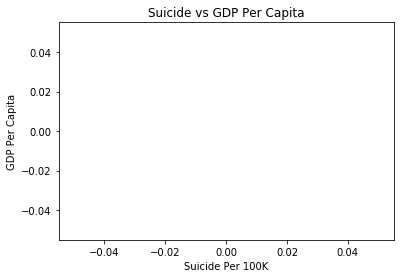

In [41]:
plt.scatter(df[(df['country'] == 'Albania') & (df['year'] == '1987')]['suicides_per_100K'],
            df[(df['country'] == 'Albania') & (df['year'] == '1987')]['gdp_per_capita'])
plt.title('Suicide vs GDP Per Capita')
plt.xlabel('Suicide Per 100K')
plt.ylabel('GDP Per Capita')
plt.show()

# Ethics & Privacy

**Data Collection**

The data we are using is being downloaded from kaggle, which is publicly available on the web. Even though the topic of suicide is extremely sensitive and private, the data we are using only shows national statistics and does not reveal information on individuals and their identities. 

**Data Storage**

The dataset is publicly available and when we update the dataset with more information, it will be stored within our Google Drive folder, where it is presumably safe since Google Drive folders are only accessible to those explicitly granted access.

**Analysis**

All of our analysis visualizations will not have any personally identifiable information. We also acknowledge the bias of this dataset toward not looking at all countries in the world. We will be careful in generalizing our results.

**Modeling**

To create models, we will be looking at variables such as GDP, country, suicide rate, and year. Through these models, we will draw conclusions to see if some variables correlate to other variables, while also being careful to account for confounding variables and potential outliers.

**Deployment**

In the case that the sensitive nature of the topic of suicide related to factors such as GDP and country cause negative impacts, we will reconsider the variables we are analyzing to meet different standards.


# Conclusion & Discussion

*Fill in your discussion information here*